# 더미 데이터 만들기

## Feature ( Input )

- 년, 월, 일, 요일, 시, 분, 초, 자동모드, 조도 센서 값

## Target Value ( Output)

- 조명의 밝기 값

---

## 센서, 액츄에이터 특징

### 조도 센서

- 0 ~ 1023 사이의 값을 가짐
- 밝을 때 센서의 값은 낮게 나옴
- 어두울 때 센서의 값은 높게 나옴

### 전등 밝기값

- 0 ~ 255 사이의 값을 가질 수 있음(PWM)
- 높을 수록 밝은 값

---

## 예상되는 규칙

- 06~15시쯤(밖 밝음, 건물 내 불 꺼짐) : 조도 센서값 낮음, 조명의 밝기 낮음
- 15시~22시쯤(밖 어둡고, 건물 내 불 켜짐) : 조도 센서값 낮음, 조명의 밝기 높음
- 22시~06시쯤(밖 어둡고, 건물 내 불 꺼짐) : 조도 센서값 높음, 노명의 밝기 높음

## 데이터 생성 방식

- 0시 0분 0초부터 23시 59분 59초까지 86400개의 row 생성
- 조도 센서 값은 해당 범위에서 cos 함수의 한 주기를 넣음. 값의 scale은 0~1023
- 조명 밝기 값은 해당 범위에서 sin 함수의 반 주기를 넣음. 값의 scale은 0~255

In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
import matplotlib.pyplot as plt

In [3]:
# illuminance, brightness
illum_range = np.linspace(0, 2*np.pi, 86400, dtype = np.float16)
bright_range = np.linspace(0, np.pi, 86400, dtype = np.float16)

In [4]:
data_illum = np.cos(illum_range)
data_illum = data_illum + 1
data_illum = data_illum * 1023 / 2
data_illum = data_illum.astype(int)
data_illum

array([1023, 1023, 1023, ..., 1023, 1023, 1023])

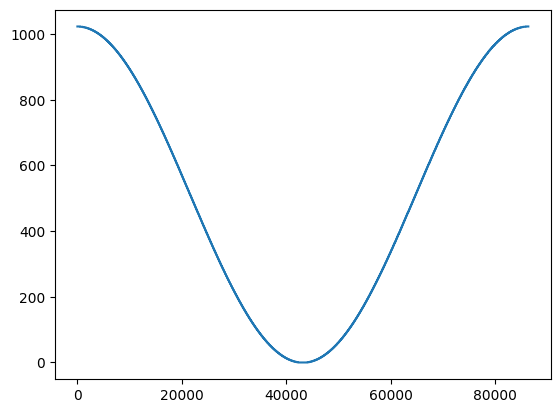

In [5]:
plt.plot(data_illum, label = "illum")
plt.show()

In [6]:
data_bright = np.sin(bright_range)
data_bright = data_bright * 255
data_bright = data_bright.astype(int)
data_bright

array([0, 0, 0, ..., 0, 0, 0])

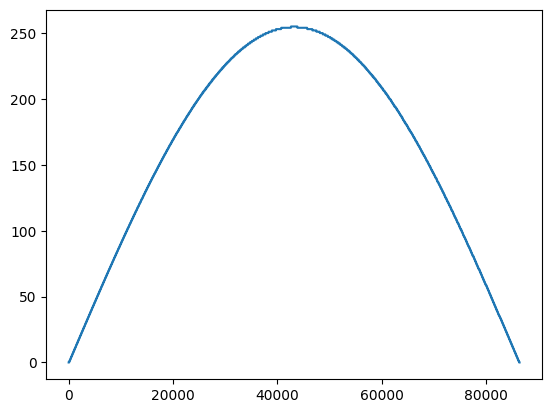

In [7]:
plt.plot(data_bright, label = "bright")
plt.show()

In [8]:
# 시작 날짜 및 시간 설정
start_datetime = datetime.datetime(2023, 11, 2, 0, 0, 0)  # 원하는 시작 날짜 및 시간 설정

# 데이터를 저장할 리스트 생성
data = []

# 1초 간격으로 데이터 생성하여 리스트에 추가
for i in range(86400):  # 하루는 총 86,400초
    current_datetime = start_datetime + datetime.timedelta(seconds=i)
    elapsed_time = current_datetime - start_datetime

#     year = elapsed_time.days // 365
#     month = (elapsed_time.days % 365) // 30
#     day = (elapsed_time.days % 365) % 30
    year = 2023
    month = 11
    day = 2
    weekday = current_datetime.strftime("%w")
    hour = current_datetime.hour
    minute = current_datetime.minute
    second = current_datetime.second

    data.append([year, month, day, weekday, hour, minute, second])

# 데이터프레임 생성
df = pd.DataFrame(data, columns=["year", "month", "day", "weekday", "hour", "minute", "second"])

# 데이터프레임 출력
print(df)


       year  month  day weekday  hour  minute  second
0      2023     11    2       4     0       0       0
1      2023     11    2       4     0       0       1
2      2023     11    2       4     0       0       2
3      2023     11    2       4     0       0       3
4      2023     11    2       4     0       0       4
...     ...    ...  ...     ...   ...     ...     ...
86395  2023     11    2       4    23      59      55
86396  2023     11    2       4    23      59      56
86397  2023     11    2       4    23      59      57
86398  2023     11    2       4    23      59      58
86399  2023     11    2       4    23      59      59

[86400 rows x 7 columns]


In [9]:
np_array = df.values
np_array = np_array.astype(int)
print(np_array)

[[2023   11    2 ...    0    0    0]
 [2023   11    2 ...    0    0    1]
 [2023   11    2 ...    0    0    2]
 ...
 [2023   11    2 ...   23   59   57]
 [2023   11    2 ...   23   59   58]
 [2023   11    2 ...   23   59   59]]


In [10]:
np_array[0]

array([2023,   11,    2,    4,    0,    0,    0])

In [16]:
data_illum = data_illum.reshape(86400, 1)
data_bright = data_bright.reshape(86400, 1)
data_illum

array([[1023],
       [1023],
       [1023],
       ...,
       [1023],
       [1023],
       [1023]])

In [18]:
mdata = np.concatenate((np_array, data_illum, data_bright),axis=1)
mdata

array([[2023,   11,    2, ...,    0, 1023,    0],
       [2023,   11,    2, ...,    1, 1023,    0],
       [2023,   11,    2, ...,    2, 1023,    0],
       ...,
       [2023,   11,    2, ...,   57, 1023,    0],
       [2023,   11,    2, ...,   58, 1023,    0],
       [2023,   11,    2, ...,   59, 1023,    0]])

--- 
## .csv 파일로 저장

In [19]:
file_path = "sample_231102.csv"
np.savetxt(file_path, mdata, delimiter=",", fmt="%d")
# delimiter : 열 구분자
# fmt: CSV 파일에 저장될 데이터의 형식 지정. %d는 정수.

## .csv 파일 불러오기

In [20]:
myData = np.genfromtxt(file_path, delimiter=",", dtype=int)
print(myData)

[[2023   11    2 ...    0 1023    0]
 [2023   11    2 ...    1 1023    0]
 [2023   11    2 ...    2 1023    0]
 ...
 [2023   11    2 ...   57 1023    0]
 [2023   11    2 ...   58 1023    0]
 [2023   11    2 ...   59 1023    0]]
